In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
sns.set()
import plotly
plotly.offline.init_notebook_mode(connected=True)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# preliminary data read, clean,and some EDA analysis

In [2]:
#csv_file = './data/NTCIR-Lifelog_formal_run_dataset.csv' #load the csv file converted from an XML file
#columns = ['user','age','day_id','date','image_directory','activity','image_id','image_path','location','gender','height','weight']
#load the file with a semicolon tab and the specific columns from the list created above
#df= pd.read_csv(csv_file,sep=';', usecols=columns, na_values=' ')
#df

In [3]:
csv_file = 'C:/Users/user1/Desktop/DATA SCIENCE/PROJECTE_FINAL/LIFELOG_REPOSITORI/data/ntcir12.csv' #load the csv file converted from an XML file
#columns = ['user','age','day_id','date','image_directory','activity','image_id','image_path','location','gender','height','weight']
df= pd.read_csv(csv_file, na_values=' ')

There are many NaN or empty slots. We select only the data where we have looged an image_id, the rest we elliminate

In [4]:
not_empty= df['image_id'].notnull()
df1=df[not_empty].reset_index() #reset the index

In [5]:
print df1.activity.value_counts(dropna=False)

walking                        7788
working                        6971
resting                        5365
mobile                         5045
transport                      3895
driving                        3001
talking                        2651
socializing                    1825
meeting                        1776
having drinks\meal alone       1652
having drinks with somebody    1418
tv                             1389
shopping                       1175
reading                        1174
having meal with somebody      1065
plane                          1030
attending a seminar            1023
cleaning and chores             827
cooking                         575
biking                          251
Name: activity, dtype: int64


# convert index  column into a timeSeries column

In [6]:
df1[df1['user']=='u1'].to_csv('user_1.csv')

In [7]:
hh=(df1['image_id'].str[-8:-6].astype(int))*3600
mm=(df1['image_id'].str[-6:-4].astype(int))*60
ss=(df1['image_id'].str[18:20].astype(int))*1
sec = hh+mm+ss 
df1['hora'] = pd.to_timedelta((sec).astype('int'), unit='s') #convert seconds to HH:MM:SS and add to new column
#df1.head()

In [8]:
df1.index = pd.to_datetime(df1['date'], format= '%d/%m/%Y',exact= True)+df1['hora']
# we assign the date and time as the index series

In [9]:
df1.head()
print df1.resample('H').head()

                          index   age  day_id  height  weight    toilet  \
2015-02-23 07:00:00   39.896104  40.0     1.0   173.0    78.0  0.018052   
2015-02-23 08:00:00  119.000000  40.0     1.0   173.0    78.0  0.001975   
2015-02-23 09:00:00  198.500000  40.0     1.0   173.0    78.0  0.000000   
2015-02-23 10:00:00  276.000000  40.0     1.0   173.0    78.0  0.003636   
2015-02-23 11:00:00  358.500000  40.0     1.0   173.0    78.0  0.000000   

                     teddy bear  sports ball   bicycle     apple     ...       \
2015-02-23 07:00:00         0.0     0.000000  0.000000  0.008701     ...        
2015-02-23 08:00:00         0.0     0.001728  0.020617  0.000000     ...        
2015-02-23 09:00:00         0.0     0.000000  0.000000  0.000000     ...        
2015-02-23 10:00:00         0.0     0.000000  0.000000  0.000000     ...        
2015-02-23 11:00:00         0.0     0.000000  0.000000  0.000000     ...        

                     giraffe     truck    bottle  suitcase    

C:\Users\user1\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

.resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)



In [10]:
df2 = df1.drop(['date','hora'])
df2[df2['user']=='u3'].head()

,index,Unnamed: 0,user,age,day_id,date,image_directory,activity,image_id,image_path,...,suitcase,cake,wine glass,baseball bat,traffic light,baseball glove,day_of_week,day_of_week_name,date_new,hora
2015-06-15 08:40:13,34142,2015-06-15 08:40:13,u3,48,52,15/06/2015,NTCIR-Lifelog_images/u3/2015-06-15/,walking,u3_2015-06-15_084013_1,/u3/2015-06-15/b00000002_21i79q_20150615_08401...,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-06-15,08:40:13
2015-06-15 08:41:22,34143,2015-06-15 08:41:22,u3,48,52,15/06/2015,NTCIR-Lifelog_images/u3/2015-06-15/,walking,u3_2015-06-15_084122_1,/u3/2015-06-15/b00000004_21i79q_20150615_08412...,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-06-15,08:41:22
2015-06-15 08:42:01,34144,2015-06-15 08:42:01,u3,48,52,15/06/2015,NTCIR-Lifelog_images/u3/2015-06-15/,walking,u3_2015-06-15_084201_1,/u3/2015-06-15/b00000005_21i79q_20150615_08420...,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-06-15,08:42:01
2015-06-15 08:42:33,34145,2015-06-15 08:42:33,u3,48,52,15/06/2015,NTCIR-Lifelog_images/u3/2015-06-15/,walking,u3_2015-06-15_084233_2,/u3/2015-06-15/b00000006_21i79q_20150615_08423...,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-06-15,08:42:33
2015-06-15 08:43:13,34146,2015-06-15 08:43:13,u3,48,52,15/06/2015,NTCIR-Lifelog_images/u3/2015-06-15/,driving,u3_2015-06-15_084313_1,/u3/2015-06-15/b00000007_21i79q_20150615_08431...,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-06-15,08:43:13


In [11]:
df1.resample('H')

C:\Users\user1\Anaconda2\lib\site-packages\IPython\lib\pretty.py:108: FutureWarning:

.resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)



,index,age,day_id,height,weight,toilet,teddy bear,sports ball,bicycle,apple,...,giraffe,truck,bottle,suitcase,cake,wine glass,baseball bat,traffic light,baseball glove,day_of_week
2015-02-23 07:00:00,39.896104,40.0,1.0,173.0,78.0,0.018052,0.000000,0.000000,0.000000,0.008701,...,0.0,0.004545,0.026234,0.000000,0.000000,0.001558,0.000000,0.002078,0.0,0.0
2015-02-23 08:00:00,119.000000,40.0,1.0,173.0,78.0,0.001975,0.000000,0.001728,0.020617,0.000000,...,0.0,0.000000,0.016543,0.006914,0.000000,0.000000,0.000000,0.002963,0.0,0.0
2015-02-23 09:00:00,198.500000,40.0,1.0,173.0,78.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.013590,0.000000,0.000000,0.003590,0.000000,0.006795,0.0,0.0
2015-02-23 10:00:00,276.000000,40.0,1.0,173.0,78.0,0.003636,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.064286,0.005584,0.004805,0.000000,0.000000,0.000000,0.0,0.0
2015-02-23 11:00:00,358.500000,40.0,1.0,173.0,78.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.141705,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2015-02-23 12:00:00,449.500000,40.0,1.0,173.0,78.0,0.000000,0.000000,0.000000,0.009149,0.000000,...,0.0,0.001809,0.149574,0.000000,0.000000,0.000000,0.000000,0.010957,0.0,0.0
2015-02-23 13:00:00,546.000000,40.0,1.0,173.0,78.0,0.000000,0.000000,0.003535,0.000000,0.000000,...,0.0,0.001111,0.066768,0.000000,0.015960,0.000000,0.000000,0.017576,0.0,0.0
2015-02-23 14:00:00,640.000000,40.0,1.0,173.0,78.0,0.001461,0.002921,0.000000,0.003820,0.003146,...,0.0,0.000000,0.091124,0.000000,0.003933,0.000000,0.000000,0.000000,0.0,0.0
2015-02-23 15:00:00,707.500000,40.0,1.0,173.0,78.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.049783,0.000000,0.000000,0.000000,0.006957,0.000000,0.0,0.0
2015-02-23 16:00:00,762.500000,40.0,1.0,173.0,78.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.005156,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [12]:
# save clean data'
#df2.to_csv('csv_clean.csv')

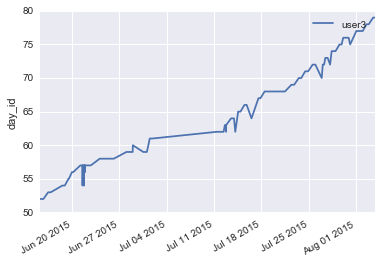

In [13]:
#plot data to check timeSerie consistency 
df_user1=df2[df2['user']=='u1'] #select only user 1
df_user2=df2[df2['user']=='u2'] #select only user 2
df_user3=df2[df2['user']=='u3'] #select only user 3
#df_user1['day_id'].plot(label='user1')
#df_user2['day_id'].plot(label = 'user2')
df_user3['day_id'].plot(label = 'user3')
plt.ylabel('day_id')
plt.legend()
plt.show()

# time period data for each user shown in the graph
# activity type and location may depend on the year period 
# there is a missing data gap for user2 for a bit longer than about 1 month

In [14]:
#describe the main features for columns 'activity' and 'location'
print (df['activity'].unique())
print '******************'
print (df_user1[['activity','location']].describe())
print (df_user2[['activity','location']].describe())
print (df_user3[['activity','location']].describe())

['mobile' 'cooking' 'having drinks\\meal alone' 'tv' 'resting' 'walking'
 'driving' 'socializing' 'reading' 'talking' 'working'
 'attending a seminar' 'shopping' 'having meal with somebody' 'transport'
 'cleaning and chores' 'having drinks with somebody' 'meeting' 'plane'
 'biking']
******************
       activity location
count     18337    10630
unique       19       61
top     walking     Work
freq       2765     2625
       activity                      location
count     15805                          9802
unique       20                            28
top     working  Dublin City University (DCU)
freq       4326                          3266
       activity location
count     15754     4838
unique       17       39
top     resting     Home
freq       2988     2389


# 1 - TRAVELING TAGS ANALYSIS

In [15]:
def percentage_activity(dataframe,activity_name):
    lenght = float(len(dataframe.dropna()))
    counts= float(dataframe.str.contains(activity_name).sum())
    percentage = 100*(counts/lenght)
    return percentage

activities = df['activity'].unique() #list of all activities

activities =activities[1:] #do not select the first value which is the nan
print activities
print 'USER 1 activities'
percentatges1 = []
for action in activities:
    activity= percentage_activity(df_user1['activity'],action) #check % of different activities for user 1
    print 'percentage of '+str(action)+' activity is %5.3f' % activity, '%'
    percentatges1.append(activity)
    

print 'USER 2 activities'    
percentatges2 = []
for action in activities:
    activity= percentage_activity(df_user2['activity'],action) #check % of different activities for user 2
    print 'percentage of '+str(action)+' activity is %5.3f' % activity, '%'
    percentatges2.append(activity)
print 'USER 3 activities' 
percentatges3 = []
for action in activities:
    activity= percentage_activity(df_user3['activity'],action) #check % of different activities for user 3
    print 'percentage of '+str(action)+' activity is %5.3f' % activity, '%'   
    percentatges3.append(activity)


['cooking' 'having drinks\\meal alone' 'tv' 'resting' 'walking' 'driving'
 'socializing' 'reading' 'talking' 'working' 'attending a seminar'
 'shopping' 'having meal with somebody' 'transport' 'cleaning and chores'
 'having drinks with somebody' 'meeting' 'plane' 'biking']
USER 1 activities
percentage of cooking activity is 1.047 %
percentage of having drinks\meal alone activity is 0.000 %
percentage of tv activity is 3.959 %
percentage of resting activity is 6.817 %
percentage of walking activity is 15.079 %
percentage of driving activity is 11.774 %
percentage of socializing activity is 1.489 %
percentage of reading activity is 4.799 %
percentage of talking activity is 9.053 %
percentage of working activity is 7.978 %
percentage of attending a seminar activity is 2.770 %
percentage of shopping activity is 3.245 %
percentage of having meal with somebody activity is 2.340 %
percentage of transport activity is 11.196 %
percentage of cleaning and chores activity is 1.347 %
percentage of 

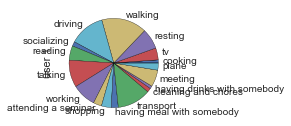

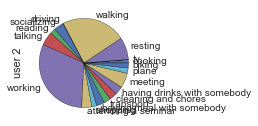

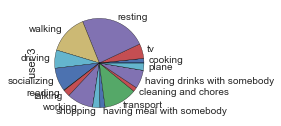

In [16]:
#Pie graph for different activities by each user:
serie1 = pd.Series(percentatges1, index=activities, name='user 1').plot.pie(figsize=(2, 2))
plt.show()
serie2 = pd.Series(percentatges2, index=activities, name='user 2').plot.pie(figsize=(2, 2))
plt.show()
serie3 = pd.Series(percentatges3, index=activities, name='user 3').plot.pie(figsize=(2, 2))

plt.show()

In [17]:
H=df['height'].unique()
max_H = np.max(H)
W= df['weight'].unique()
max_W = np.max(W)
A= df['age'].unique()
max_A = np.max(A)

print H,W,A


[173 183 176] [78 74 85] [40 33 48]


user2 is the tallest
user3 is the heaviest
user 2 is the youngest

In [18]:
print df.columns
df.groupby(['activity']).count()

Index([u'Unnamed: 0', u'user', u'age', u'day_id', u'date', u'image_directory',
       u'activity', u'image_id', u'image_path', u'location', u'gender',
       u'height', u'weight', u'filename', u'toilet', u'teddy bear',
       u'sports ball', u'bicycle', u'apple', u'laptop', u'scissors', u'donut',
       u'snowboard', u'carrot', u'zebra', u'oven', u'keyboard', u'pottedplant',
       u'tvmonitor', u'chair', u'parking meter', u'mouse', u'frisbee', u'boat',
       u'kite', u'hair drier', u'horse', u'motorbike', u'banana', u'cup',
       u'backpack', u'toaster', u'bowl', u'microwave', u'bench',
       u'fire hydrant', u'book', u'diningtable', u'elephant', u'orange',
       u'tie', u'bird', u'knife', u'pizza', u'fork', u'sheep', u'sandwich',
       u'umbrella', u'aeroplane', u'tennis racket', u'sofa', u'bus', u'bear',
       u'vase', u'toothbrush', u'spoon', u'train', u'sink', u'stop sign',
       u'handbag', u'cell phone', u'broccoli', u'refrigerator', u'remote',
       u'surfboard', u'cow'

,Unnamed: 0,user,age,day_id,date,image_directory,image_id,image_path,location,gender,...,bottle,suitcase,cake,wine glass,baseball bat,traffic light,baseball glove,day_of_week,day_of_week_name,date_new
activity,,,,,,,,,,,,,,,,,,,,,
attending a seminar,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,...,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023
biking,251,251,251,251,251,251,251,251,12,251,...,251,251,251,251,251,251,251,251,251,251
cleaning and chores,827,827,827,827,827,827,827,827,506,827,...,827,827,827,827,827,827,827,827,827,827
cooking,575,575,575,575,575,575,575,575,280,575,...,575,575,575,575,575,575,575,575,575,575
driving,3001,3001,3001,3001,3001,3001,3001,3001,355,3001,...,3001,3001,3001,3001,3001,3001,3001,3001,3001,3001
having drinks with somebody,1418,1418,1418,1418,1418,1418,1418,1418,836,1418,...,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418
having drinks\meal alone,1652,1652,1652,1652,1652,1652,1652,1652,987,1652,...,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652
having meal with somebody,1065,1065,1065,1065,1065,1065,1065,1065,840,1065,...,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065
meeting,1776,1776,1776,1776,1776,1776,1776,1776,1776,1776,...,1776,1776,1776,1776,1776,1776,1776,1776,1776,1776


In [19]:
# save clean data'
df.to_csv('csv_clean.csv')

In [20]:
#!pip install geopy

In [21]:
from geopy.geocoders import Nominatim

In [22]:
# LET'S TRY TO PUT THE LOCATIONS ON A MAP:

geolocator = Nominatim()
locations = df_user1['location'].unique() #list of all locations for user 1

latitude = []
longitude = []
locations=locations[2:]
locations_found=[]

for loc in locations:
    print(loc)
    try:
        location = geolocator.geocode(unicode(loc, "utf-8"))
        latitude.append(location.latitude)
        longitude.append(location.longitude)
        locations_found.append(loc)
    except:
        print('not found')

print(len(longitude))

Work
Place in Grattan Lodge
Verbena Avenue
Dublin City University (DCU)
Science Gallery Caf�
not found
The Helix
DCU School of Nursing
not found
Thunder Road Caf�
not found
The Westin
Brown Thomas
Place in Saint Anne's Park
not found
Place in Rose Garden
Costa Coffee
Starbucks
Dunnes Stores
Dublin Airport (DUB) - Aerfort Bhaile �tha Cliath
not found
Bayside
Lidl
O'Brien Centre for Science
Howth Junction Business Centre
not found
Hilan Korean & Chinese Restaurant
not found
Place in Dublin 9
Place in Balgriffin
not found
Dublin Airport T2 Car Park
not found
Place in Dardistown
not found
Place in Greater Manchester
Car Rental Village
McDonald's
Sheffield University - Portobello Centre
not found
Novotel
Sheffield Tap
Caf� Rouge
not found
The Antiques Emporium
Kinder Lodge
Devonshire Arms
Waterstones
Manchester International Airport (MAN)
not found
Web Summit HQ
not found
Pavilions Shopping Centre
Waterside
Eddie Rocket's
Place in Dublin City University
not found
Homebase
Power City
Rathdow

In [23]:
#!pip install plotly

In [24]:
lons = longitude
lats = latitude

 
data = [ dict(
        type = 'scattergeo',
        locationmode = 'Europe',
        lon = lons,
        lat = lats,
        text = locations_found,
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            )))]

layout = dict(
        title = 'Locations visited by user 1 (there are some mistakes...)',
        colorbar = True,
        geo = dict(
            scope='europe',
            projection=dict( type='albers us' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='d3-airports' )

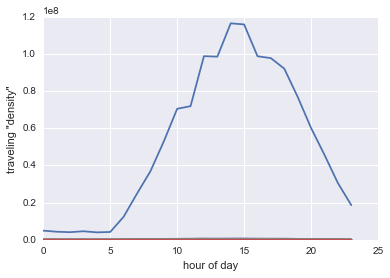

In [25]:
df2['hour'] = df2.index.hour
# Which hour are they traveling?
df2['traveling']= df2.activity.notnull()
df2_hours = df2.groupby(['hour']).sum()
plt.plot(df2_hours)
plt.xlabel('hour of day')
plt.ylabel('traveling "density"')
plt.show()

In [26]:
# HEATMAP, traveling during the week
df2['day_of_week'] = df2.index.dayofweek
df2['week'] = df2.index.weekofyear

df2_u1 = df2[df2.user == 'u1']
df2_u2 = df2[df2.user == 'u2']
df2_u3 = df2[df2.user == 'u3']
%pylab qt
fig_heat,axn_heat = plt.subplots(3, 1, sharex=False, sharey=False)
sns.set(font_scale=1.3)

df2_u1_week = df2_u1.pivot_table(df2_u1, index='week', columns='day_of_week', aggfunc=np.sum)#,values='traveling' columns='day_of_week', index= 'day')
df2_u1_week = df2_u1_week['traveling']
mask = df2_u1_week.isnull()
df2_u1_week.columns.name = ''
sns.heatmap(df2_u1_week, xticklabels=False, annot=True, annot_kws={"size": 19}, yticklabels=True, mask=mask, cmap="YlOrRd", vmax= 800, ax=axn_heat.flat[0] ).set_title('user1', fontsize=12)
#sns.plt.show()
df2_u2_week = df2_u2.pivot_table(df2_u2, index='week', columns='day_of_week', aggfunc=np.sum)#,values='traveling' columns='day_of_week', index= 'day')
df2_u2_week = df2_u2_week['traveling']
mask = df2_u2_week.isnull()
df2_u2_week.columns.name = ''
sns.heatmap(df2_u2_week, xticklabels=False, yticklabels=True, mask=mask, cmap="YlOrRd", vmax= 800, ax=axn_heat.flat[1] ).set_title('user2', fontsize=12)
#sns.plt.show()
df2_u3_week = df2_u3.pivot_table(df2_u3, index='week', columns='day_of_week', aggfunc=np.sum)#,values='traveling' columns='day_of_week', index= 'day')
df2_u3_week = df2_u3_week['traveling']
mask = df2_u3_week.isnull()
df2_u3_week.columns.name = ''
#df2_u3_week.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.heatmap(df2_u3_week, xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], yticklabels=True, mask=mask, cmap="YlOrRd", vmax= 800, ax=axn_heat.flat[2] ).set_title('user3', fontsize=12)
#sns.plt.show()
sns.plt.suptitle('TRAVELING (num. of occurences per day)', fontsize=15)
sns.plt.show()


Populating the interactive namespace from numpy and matplotlib


In [27]:
# HEATMAP, which activities and when during the week
df2['walking']=df2['activity']=='walking'
df2['transport']=df2['activity']=='transport'
df2['running']=df2['activity']=='running'
df2['cycling']=df2['activity']=='cycling'
df2['car']=df2['activity']=='car'
df2['bus']=df2['activity']=='bus'
df2_week = df2.pivot_table(df2, index='week', columns='day_of_week', aggfunc=np.sum)#,values='traveling' columns='day_of_week', index= 'day')

df2_week_transport = df2_week['transport']
mask = df2_week_transport.isnull()
#a = sns.heatmap(df2_week_transport, xticklabels=True, yticklabels=True, mask=mask, vmax= 270 )
#sns.plt.show()

df2_week_walking = df2_week['walking']
mask = df2_week_walking.isnull()
#a = sns.heatmap(df2_week_walking, xticklabels=True, yticklabels=True, mask=mask, vmax= 130 )
#sns.plt.show()

df2_week_running = df2_week['running']
mask = df2_week_running.isnull()
#a = sns.heatmap(df2_week_running, xticklabels=True, yticklabels=True, mask=mask )
#sns.plt.show()

df2_week_cycling = df2_week['cycling']
mask = df2_week_cycling.isnull()
#a = sns.heatmap(df2_week_cycling, xticklabels=True, yticklabels=True, mask=mask )
#sns.plt.show()

df2_week_car = df2_week['car']
mask = df2_week_car.isnull()
#a = sns.heatmap(df2_week_car, xticklabels=True, yticklabels=True, mask=mask, vmax= 4 )
#sns.plt.show()

df2_week_bus = df2_week['bus']
mask = df2_week_bus.isnull()
#a = sns.heatmap(df2_week_bus, xticklabels=True, yticklabels=True, mask=mask, vmax= 200 )
#sns.plt.show()

In [28]:
df2_grouped_week = df2.groupby(['day_of_week']).sum()
print df2_grouped_week[['walking', 'transport','running','cycling','car','bus']]
plt.plot(df2_grouped_week[['walking', 'transport','running','cycling','car','bus']])
plt.legend(['walking', 'transport','running','cycling','car','bus'], loc=2)
plt.xlabel('day_of_week')
plt.show()

             walking  transport  running  cycling  car  bus
day_of_week                                                
0             1228.0      479.0      0.0      0.0  0.0  0.0
1              912.0      530.0      0.0      0.0  0.0  0.0
2              994.0      484.0      0.0      0.0  0.0  0.0
3             1060.0      178.0      0.0      0.0  0.0  0.0
4             1131.0      585.0      0.0      0.0  0.0  0.0
5             1742.0     1442.0      0.0      0.0  0.0  0.0
6              721.0      197.0      0.0      0.0  0.0  0.0


# EDA SUMAR APARICIONS DE CADA TAG DE YOLO


In [29]:
df = df.drop(['image_directory','image_id','image_path','filename', 'day_of_week_name'], 1)
df = df.drop(['gender'],1) # only males
a= df>0.01
df_freq_yolo = df.where(~a.values, other=1)

In [30]:
%pylab qt
yolo_aux = df_freq_yolo.sum(axis=None, skipna=None)
yolo_aux=yolo_aux[9:-3]
yolo_aux.sort_values(ascending= False, inplace=True)
print yolo_aux.head()
print yolo_aux.tail()

fig2 = yolo_aux.plot(kind='bar',title='YOLO"S TAGS FREQUENCE IN  DATASET')
plt.show()

Populating the interactive namespace from numpy and matplotlib
person        37499.0
chair         16569.0
tvmonitor     15037.0
laptop        11872.0
cell phone     9649.0
dtype: float64
baseball bat     27.0
tennis racket    20.0
skis             17.0
zebra            14.0
giraffe           9.0
dtype: float64


In [31]:
# TAG FREQUENCY PER ACTIVITY
df_activity = df.groupby(['activity']).sum()
df_activity= df_activity.iloc[:,4:-1]

df_activity = df_activity.transpose()
df_activity['total_count'] = df_activity.sum(axis=1)
df_activity.sort_index(by = 'total_count', ascending=False, inplace=True)
df_activity = df_activity.transpose()
df_activity = df_activity[df_activity.columns[0:42]]
df_activity.drop('total_count', inplace=True)

C:\Users\user1\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning:

by argument to sort_index is deprecated, pls use .sort_values(by=...)



In [38]:
%pylab qt
for i in [1,3,18]:
    plt.figure()
    a = df_activity.iloc[i].plot(kind='bar', fontsize=17)
    plt.title(df_activity.index[i]+' (groundtruth)', fontsize=20)
    a.set_ylabel("num. occurrences", fontsize=17)
    plt.subplots_adjust(bottom=0.25)
    plt.show()

Populating the interactive namespace from numpy and matplotlib


In [42]:
# ACTIVITY FREQUENCY
%pylab qt
df_activity_freq=df[['activity','Unnamed: 0']].groupby('activity').count()
df_activity_freq.head()
df_activity_freq.sort_values('Unnamed: 0', ascending= False, inplace=True)
df_activity_freq.plot(kind='bar', legend=False, fontsize=17)
plt.title('Activity (groundtruth) Frequency', fontsize=20)
plt.subplots_adjust(bottom=0.38)

Populating the interactive namespace from numpy and matplotlib
